### **●回帰分析の実装**

In [12]:
#回帰分析についてpythonを用いて実装してみましょう。
#線形回帰モデルを用いるものとし、有名なカリフォルニア住宅価格データセットを用います。

#まずはライブラリーからの読みこみを行う
import pandas as pd
import numpy as np

#次にデータセットの読みこみを行う
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# ボストンデータセットのデータフレームの作成
df = pd.DataFrame(housing.data, columns=housing.feature_names)
# 目的変数(PRICE)をデータフレームに結合
df['PRICE'] = np.array(housing.target)


In [ ]:
#まずはデータセット全体を点検する（データサイエンスでは必須の作業）
df

In [ ]:
#各変数間のペアプロットを見て、俯瞰しただけで何となく分かる相関関係をつかみます。

# pandasのscatter_matrix関数を使いペアプロットを表示
from pandas.plotting import scatter_matrix
fig = pd.plotting.scatter_matrix(df, figsize=(15,15))

#なお、各変数名の概要は次のとおりである。
#Medlnc	世帯所得の中央値
#HouseAge	住宅の築年数
#AveRooms	住宅の部屋数の平均
#AveBedrms	住宅の寝室数の平均
#Poplation	居住人数の合計
#AveOcuup	世帯人数の平均
#Latitude	各地区における代表地区の緯度
#HousePrices	各地区における代表地区の軽度

In [ ]:
#次に線形回帰のモデル構築を行ってみる。

from sklearn.model_selection import train_test_split
# 説明変数の抽出(CRIME、RM)
data = df.loc[:,['MedInc','Population']].values
# 目的変数の抽出
target = df.loc[:,'PRICE'].values
# データの分割(訓練データ、検証データ)
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

# sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression
# 線形モデルのオブジェクト生成
model = LinearRegression()
# モデルの学習
model.fit(X_train, y_train)

In [ ]:
#modelの検証をしてみる。

# 作成したモデルから予測(学習用、検証用モデル使用)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 誤差の計算
from sklearn.metrics import mean_squared_error
# 平均二乗誤差：小さいほど誤差の小さなモデルと言える
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
# 決定係数：回帰式の適合性の指標(1に近いほど良い)
print('R^2 Train : %.3f, Test : %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))

#決定係数が0.5より低いと精度が悪いということになる。

In [ ]:
#全ての特徴を盛り込んでモデルを再構築する。

# 説明変数の抽出(13個の変数)
data = df.loc[:,'MedInc':'Longitude'].values
print(data.shape)

# 以下は先ほどのデータ処理と同様の処理を実施
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 Train : %.3f, Test : %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))

#制度は向上したかどうか？

# **●関連演習**

―特徴量を3つ、4つに絞り込んであらためてモデル構築を行い、精度が変わるかどうかを確認してみよう。

ーカリフォルニア住宅価格以外に[sklearnからダウンロード可能なデータセット](https://hackernoon.com/ja/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E6%A7%8B%E7%AF%89%E3%81%AB%E6%9C%80%E9%81%A9%E3%81%AA-16-%E3%81%AE-sklearn-%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88)を見つけ、同じ様にモデル構築をしてみよう。



## **●畳込みニューラルネットワーク（CNN）の実装**

In [ ]:
#画像認識のための典型的なアルゴリズムであるCNNを学んで行きます。
#データセットハMNISTを用います。

#まずはライブラリーからダウンロードする。

import keras
from keras.datasets import mnist

# mnist からトレーニングデータセットとバリデーションデータセットをダウンロードする
# xは画像データ、yは画像の判定ラベル
# x_trainデータは28*28ピクセル画像が60000枚 (60000, 28, 28)
# x_testデータは28*28ピクセル画像が10000枚 (10000, 28, 28)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#試しに画像を128枚ほど出してみる。手書きの数字が映し出される。

import numpy as np
from PIL import Image

# 文字画像表示
def ConvertToImg(img):
    return Image.fromarray(np.uint8(img))

# MNIST一文字の幅
chr_w = 28
# MNIST一文字の高さ
chr_h = 28
# 表示する文字数
num = 128

# MNISTの文字をPILで１枚の画像に描画する
canvas = Image.new('RGB', (int(chr_w * num/2), int(chr_h * num/2)), (255, 255, 255))

# MNISTの文字を読み込んで描画
i = 0
for y in range( int(num/2) ):
    for x in range( int(num/2) ):
        chrImg = ConvertToImg(x_train[i].reshape(chr_w, chr_h))
        canvas.paste(chrImg, (chr_w*x, chr_h*y))
        i = i + 1

canvas.show()
# 表示した画像をJPEGとして保存
canvas.save('mnist.jpg', 'JPEG', quality=100, optimize=True)

canvas

In [36]:
#次にデータの前処理(preprocessing)を行う。
#正解ラベル(y)を 10個の確率データ の形式に変換する。今の正解ラベルは 1~9のラベルになっており、学習モデルの出力形式である10個の確率データに合わないため。例: [0, 1, ..., 0]。左から数字1,2, ... 9の確率
#画像データ(x)は扱いやすいように 0~1の間の数値にする。今は min:0(白) ~ max:255(黒)を表す。

from keras.utils import to_categorical

# mnistの画像データはグレースケール画像であり、min:0(白)~max:255(黒)を表す。入力を0~1の範囲にした方が都合がよいので255で割る。
X_train = x_train.reshape(60000, 28,28,1)/255
X_test = x_test.reshape(10000, 28,28,1)/255
# 学習モデルの出力が 10個の確率データ(例: [0, 1, ..., 0])になるので、今の形式(画像が0~9のうちのどの数字か)はかみ合わない。そこで形式をそろえるために変換する
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [37]:
#学習モデルを構築してみる。

from keras.models import Sequential
from keras.layers import Dense , Activation, Convolution2D , MaxPooling2D, Flatten

model = Sequential()
model.add(Convolution2D(10, (5,5), input_shape=(28,28,1), activation="relu")) # 2D畳み込み層
model.add(MaxPooling2D(2,2)) # Maxプーリング層
model.add(Convolution2D(10, (5,5), padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, (5,5), padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Flatten()) # 平坦化層。入力画像を１次元配列に変換して出力する。全結合層に接続する前に使われる。
model.add(Dense(10, activation="softmax")) # 全結合層

In [ ]:
#modelを図示してみる。

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

# **●CNNの基本的な仕組みを学んでみよう。**

**畳み込み層(Convolution)とは**

画像の特徴点を見つけること。

画像にカーネルを充てることで特徴点(特徴マップ)を得る。

カーネルの数字によって抽出できる特徴が変わる。

CNNにおいてカーネルが重みであり、よいCNNモデルとは最適なカーネルを持ったモデルのことを言う。

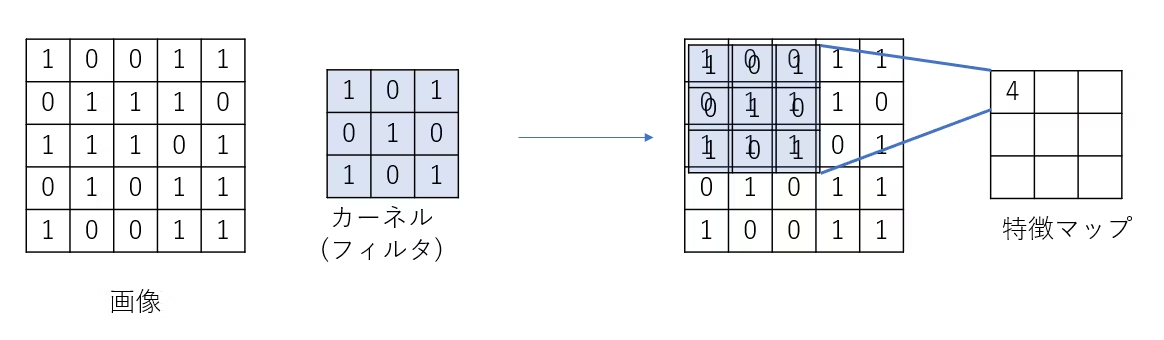

**プーリング層(Pooling)とは**

識別に不必要な特徴量をそぎ落とす。識別に必要な特徴量を抽出する処理を言う
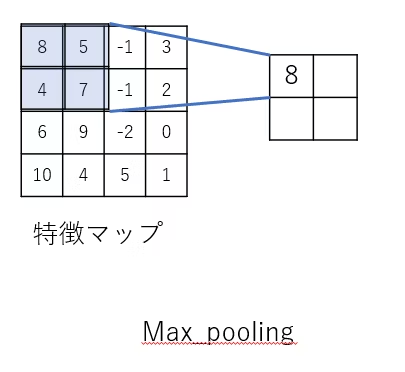




**全結合層(Dense)とは**

畳み込み層も、プーリング層も、出力は画像のまま(特徴マップ)である。

最終的には画像を与えると、1~9のように識別したいので、出力を１次元にしたい。その
ために全結合層がある。

全結合層の前にFlatten層で平坦化する。

In [ ]:
#前段で構築したsequentialモデルにデータセットを実装し、学習済みモデルを作る。

from keras.callbacks import EarlyStopping

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics="accuracy")

# 学習
model.fit(X_train, Y_train, epochs=1, batch_size=100, validation_data=(X_test, Y_test), callbacks=[EarlyStopping()])

# モデル評価
score = model.evaluate(X_test, Y_test, verbose=0)
print("loss:", score[0])
print("accuracy:", score[1])

#学習モデルの評価についてはlossはモデルの出力値と、教師データの結果の誤差。0に近いほど良い。accuracyはモデルの出力値の正答率。1に近いほどよい。

In [ ]:
#学習済みモデルを用いて推論してみる。

import matplotlib.pyplot as plt
from keras.models import load_model

# 学習済みモデルを保存しておく
model.save('MNIST_NN.h5')
MNIST_NN = load_model('MNIST_NN.h5')

# 学習済みモデルに、mnistのバリデーション画像を渡して推論してみる
predicted = MNIST_NN.predict(x_test[0].reshape(1, 28, 28, 1))
print(np.argmax(predicted)) # 最も確率の高い数字を出力する


In [ ]:
#果たして正解か？

plt.imshow(x_test[0], cmap=plt.cm.gray_r)
plt.show

## **●関連演習**

―米国人たちによる手書き数字を用いたMNISTに対して、我が国の「くずし文字」に関するデータセットであるKMNISTがあります。これを用いて同様のモデル構築をし、評価をしてみましょう。[なおKMNISTのデータダウンロードなどは以下を参照してみてください。](https://sw1227.hatenablog.com/entry/2018/12/10/002329)